## Extract Data

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

matches_df = pd.read_csv("./data/kaggle/WorldCupMatches.csv")

## Transform

1. Remove duplicates

In [103]:
matches_df = matches_df.drop_duplicates()

### Filter only Colombia rows

1. Constants will be used for filtering the required data.

In [104]:
colombia_str = "Colombia"
home_team_col = "Home Team Name"
away_team_col = "Away Team Name"
home_team_goals = "Home Team Goals"
away_team_goals = "Away Team Goals"

2. Get Colombia home matches.

In [105]:

colombia_home = matches_df[matches_df[home_team_col] == colombia_str]

3. Get Colombia away matches.

In [106]:
colombia_away = matches_df[matches_df[away_team_col] == colombia_str]

4. Concat both data frames to get a complete data frame with all Colombia's matches.

In [107]:
colombia_matches = pd.concat([colombia_home, colombia_away])

## Visualization

### Task 1: Display how many goals Colombia scored and received in a vertival bar chart.

1.. Calculate total scored goals.

In [108]:
scored_goals = colombia_home[home_team_goals].sum() + colombia_away[away_team_goals].sum()

2. Calculate total received goals.

In [109]:
received_goals = colombia_home[away_team_goals].sum() + colombia_away[home_team_goals].sum()

#### Create Bar Chart

1. Define bar labels and values.

In [110]:
# Define data for the bar chart
types = ["Scored", "Received"]
goals = [scored_goals, received_goals]

2. Create plot.

[Text(0, 0, '26'), Text(0, 0, '27')]

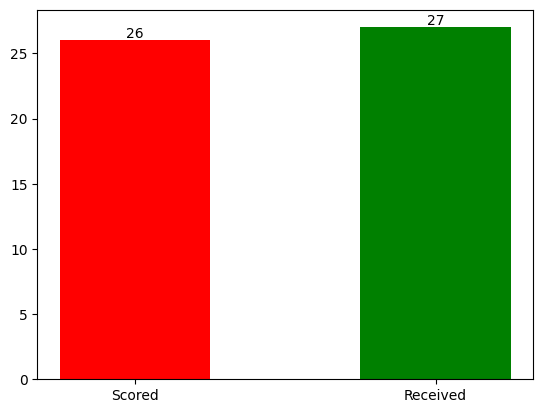

In [111]:

# Create subplots
fig, goals_ax = plt.subplots()

# Create bar chart
bar = goals_ax.bar(types, goals, 0.5, label=type, color={"green", "red"})

# Add bars' labels
goals_ax.bar_label(bar, label_type="edge")

3. Set additional descriptive information for the chart.

In [112]:
goals_ax.set_title("Scored and Received goals of Colombia National Team")
goals_ax.set_xlabel("Goals")
goals_ax.set_ylabel("Amount")

Text(4.444444444444452, 0.5, 'Amount')

4. Display plot

In [113]:
plt.show()

### Task 2: Display wins, draws and defeats of Colombia's National Team. (Bar chart)

1. Get Colombia won matches.

In [114]:
local_wins = colombia_home[colombia_home[home_team_goals] > colombia_home[away_team_goals]]
away_wins = colombia_away[colombia_away[away_team_goals] > colombia_away[home_team_goals]]

total_wins = local_wins.shape[0] + away_wins.shape[0]
total_wins

7

2. Get Colombia draw matches.

In [115]:
draws = colombia_matches[colombia_matches[home_team_goals] == colombia_matches[away_team_goals]].shape[0]
draws

2

3. Get Colombia's defeats.

In [116]:
defeats = colombia_matches.shape[0] - (total_wins + draws)
defeats

9

#### Bar Chart

1. Define bar labels, values and colors.

In [117]:
bar_labels = ["Wins", "Draws", "Defeats"]
bar_values = [total_wins, draws, defeats]
bar_colors = {"green", "gray", "red"}

2. Create the subplots.

[Text(0, 0, '7'), Text(0, 0, '2'), Text(0, 0, '9')]

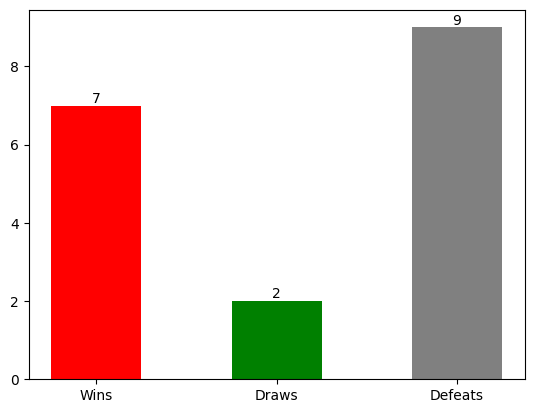

In [118]:
fig, stats_ax = plt.subplots()

stats_bar = stats_ax.bar(bar_labels, bar_values, width=0.5, color=bar_colors)
plt.bar_label(stats_bar, label_type="edge")

4. Display plots.

In [119]:
plt.show()